# Project Description

The objecive of the project is to implement the learnings from the lectures of the subject to solve a real life problem.

For this project we have taken a dataset "Pima Indians Diabetes Database" from Kaggle. The dataset contains several diagnostic measures of females above the age of 21.

The **goal** is to use the several predictor variables (diagnostic measures) to correctly predict whether the patient has diabetes or not.

# Implementation


1. First we need to identify the problem and approach to solve it. The problem statement is straight-froward - predict whether the patient is diabetic or not with the help of the avialable data. This is clearly a categorical problem, that is, a binary classification problem (the patient is either diabetic or they are not)

2. Then what we need to do is to check for inconsistencies, erratic values and errors in the data. But the dataset is a complete dataset and does not require data cleaning. Therefore, we can move forward to the next step.

3. For a binary classification problem, several established algorithms can be used. We have decided to carry out the solution with the help of binary logistic regression.

Below is the code for the same, followed by the results.

In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

In [ ]:
# read the data into a dataframe though pandas

diabetesDF = pd.read_csv("diabetes.csv")
print(diabetesDF.head)

<bound method NDFrame.head of      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]>


In [ ]:
# checking for null values

diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Although there are no null values, upon close observation it is visible that too many 0's stand out in the columns of BMI, blood pressure, skin thickness; which makes no sense.

Therefore these values are treated as missing values and are filled with the appropriate values as shown below

In [ ]:
# replace the 0's by null and count the null values

diabetesDF[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetesDF[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetesDF.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# replacing the missing values by the medians of the attributes grouped by the outcome

columns = diabetesDF.columns
columns = columns.drop("Outcome")

for i in columns:    
  diabetesDF[i] = diabetesDF[i].fillna(diabetesDF.groupby("Outcome")[i].transform("median"))

diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


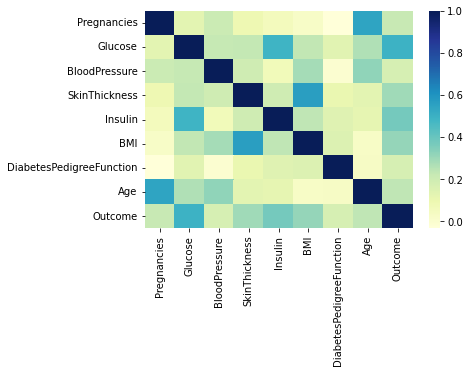

In [ ]:
# checking correlation between the diagnostic measures and the outcome

correlation = diabetesDF.corr()
sns.heatmap(correlation, cmap="YlGnBu", xticklabels=correlation.columns, yticklabels=correlation.columns)

In [ ]:
# preparing data for model

trainDF = diabetesDF[:660]
testDF = diabetesDF[660:]

train_label = np.asarray(trainDF["Outcome"])
train_data = np.asarray(trainDF.drop("Outcome", 1))
test_label = np.asarray(testDF["Outcome"])
test_data = np.asarray(testDF.drop("Outcome", 1))

In [ ]:
# normalizing data for effective learning of the model

means = np.mean(train_data, axis=0)     #mean
stddevs = np.std(train_data, axis=0)    #standard deviation

train_data = (train_data - means)/stddevs
test_data = (test_data - means)/stddevs

np.mean(train_data, axis=0)
np.std(train_data, axis=0)

In [ ]:
# train the model

diabetesCheck = LogisticRegression(solver="lbfgs", max_iter=1000)
diabetesCheck.fit(train_data, train_label)

test_pred = diabetesCheck.predict(test_data)

from sklearn.metrics import classification_report
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        65
           1       0.76      0.60      0.68        43

    accuracy                           0.77       108
   macro avg       0.77      0.74      0.75       108
weighted avg       0.77      0.77      0.76       108



In [ ]:
# test the model

accuracy = diabetesCheck.score(test_data, test_label)
print("Accuracy = ", accuracy * 100, "%")

Accuracy =  76.85185185185185 %


Text(0.5, 0, 'Importance')

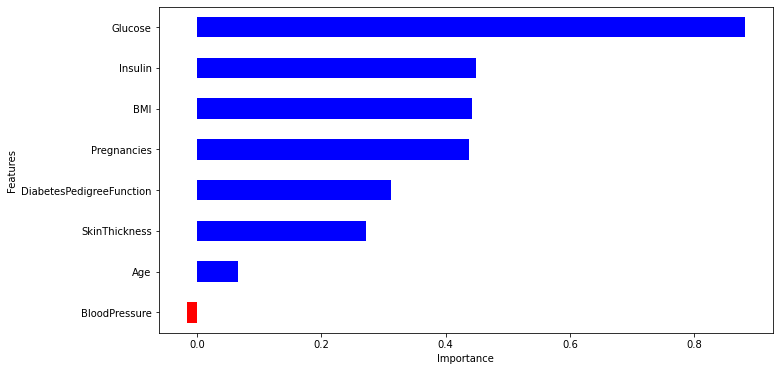

In [ ]:
# shows which features have greater effect on the outcome

coeff = list(diabetesCheck.coef_[0])
labels = list(trainDF.drop("Outcome", 1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')